1. Họ và tên:  Nguyễn Vũ Dương

2. MSSV:  20520465

3. Bài tập 1 

4. Ngày thực hiện: 26/9/2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision
from torchvision import datasets
from imutils import paths
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
data_path='./'
dataset =  datasets.Caltech101(data_path, download=True)


0it [00:00, ?it/s]

Extracting ./caltech101/101_ObjectCategories.tar.gz to ./caltech101


0it [00:00, ?it/s]

Extracting ./caltech101/Annotations.tar to ./caltech101


In [ ]:
image_paths = list(paths.list_images('./caltech101'))

data = []
labels = []
for img_path in tqdm(image_paths):
    label = img_path.split(os.path.sep)[-2]
    if label == "BACKGROUND_Google":
        continue
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    size = img.shape[0]*img.shape[1]
    hist = hist/size

    data.append(hist)
    labels.append(label)
    
data = np.array(data)
labels = np.array(labels)


100%|██████████| 9144/9144 [00:12<00:00, 759.32it/s] 


In [ ]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(f"Total Number of Classes: {len(lb.classes_)}")


Total Number of Classes: 101


In [ ]:
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

x_train = x_train.reshape(len(x_train), 256)
x_val = x_val.reshape(len(x_val), 256)
x_test = x_test.reshape(len(x_test), 256)



In [ ]:
print(len(x_train))
print(len(x_val))
print(len(x_test))

5206
1735
1736


#Yêu cầu 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [ ]:
k_neighbor = list(range(1,11))
acc = []
acc_val = []
knn_model = KNN(n_neighbors=1,p = 2)
knn_model.fit(x_train, y_train)
acc_check=knn_model.score(x_test, y_test)
acc_check_val = knn_model.score(x_val, y_val)
for i in  k_neighbor:
  knn = KNN(n_neighbors=i,p = 2)
  knn.fit(x_train, y_train)
  acc.append(knn.score(x_test, y_test))
  acc_val.append(knn.score(x_val, y_val))
  if acc[-1]>acc_check:
    knn_model = knn
    acc_check = acc[-1]


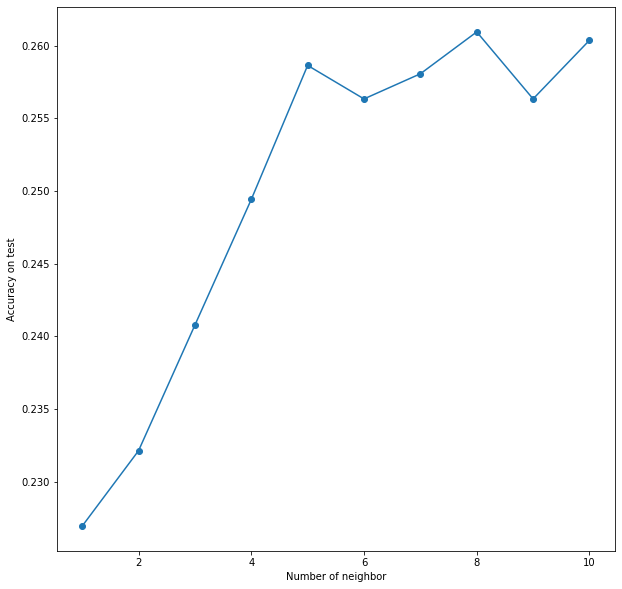

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(k_neighbor, acc, '-o')
plt.xlabel('Number of neighbor')
plt.ylabel('Accuracy on test')
plt.show()

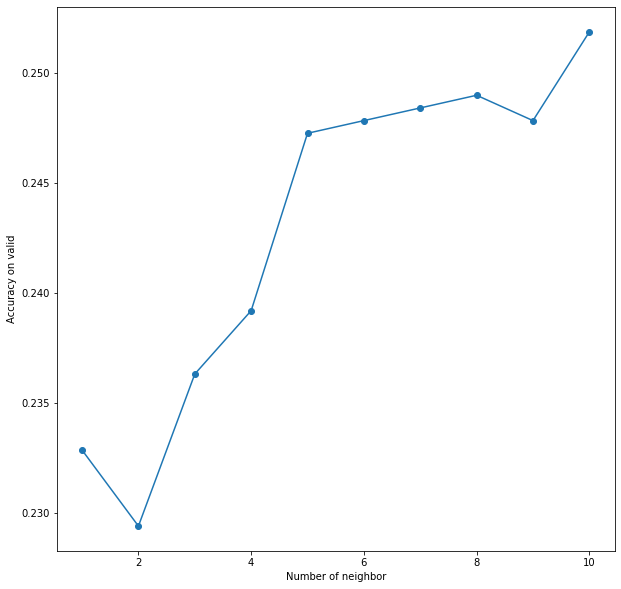

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(k_neighbor, acc_val, '-o')
plt.xlabel('Number of neighbor')
plt.ylabel('Accuracy on valid')
plt.show()

#Yêu cầu 2

In [ ]:
from sklearn import svm


In [ ]:
model = svm.SVC(C = 100 ) 


model.fit(x_train, y_train)


y_pred = model.predict(x_test)

In [ ]:
from sklearn import metrics
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2759216589861751


In [ ]:
from sklearn import metrics


In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.158     0.467     0.236        92
           1      0.185     0.561     0.279        82
           2      0.746     0.978     0.846        45
           3      0.582     0.815     0.679       157
           4      0.182     0.400     0.250         5
           5      0.498     0.733     0.593       150
           6      0.000     0.000     0.000         7
           7      0.000     0.000     0.000         8
           8      0.000     0.000     0.000        10
           9      0.000     0.000     0.000        11
          10      0.000     0.000     0.000         9
          11      0.333     0.125     0.182         8
          12      0.000     0.000     0.000        28
          13      0.259     0.280     0.269        25
          14      0.000     0.000     0.000        13
          15      0.000     0.000     0.000        15
          16      0.133     0.105     0.118        19
          17      0.333    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Yêu cầu 3

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC


In [ ]:
svc_one_one_sp = SVC()



In [ ]:
SVM_one = svm.SVC(C=1,decision_function_shape='ovo')
SVM_one.fit(x_train, y_train)

SVC(C=1, decision_function_shape='ovo')

In [ ]:
o_vs_o = OneVsOneClassifier(svc_one_one_sp)



In [ ]:
o_vs_o.fit(x_train, y_train)



OneVsOneClassifier(estimator=SVC())

In [ ]:
y_pred_one_one = o_vs_o.predict(x_test)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_one_one))

Accuracy: 0.2626728110599078


In [ ]:
print("Support vector:", len(SVM_one.support_vectors_))

Support vector: 4807


In [ ]:
SVM_one.support_vectors_.shape

(4807, 256)

In [ ]:
y_pred_valid_one_one = o_vs_o.predict(x_val)


In [ ]:
print(metrics.confusion_matrix(y_val, y_pred_valid_one_one))

[[34 24  0 ...  0  0  0]
 [26 58  0 ...  0  0  0]
 [ 4  2 33 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  2]
 [ 0  0  0 ...  0  4  0]
 [ 1  1  0 ...  0  0  1]]


In [ ]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred_valid_one_one)

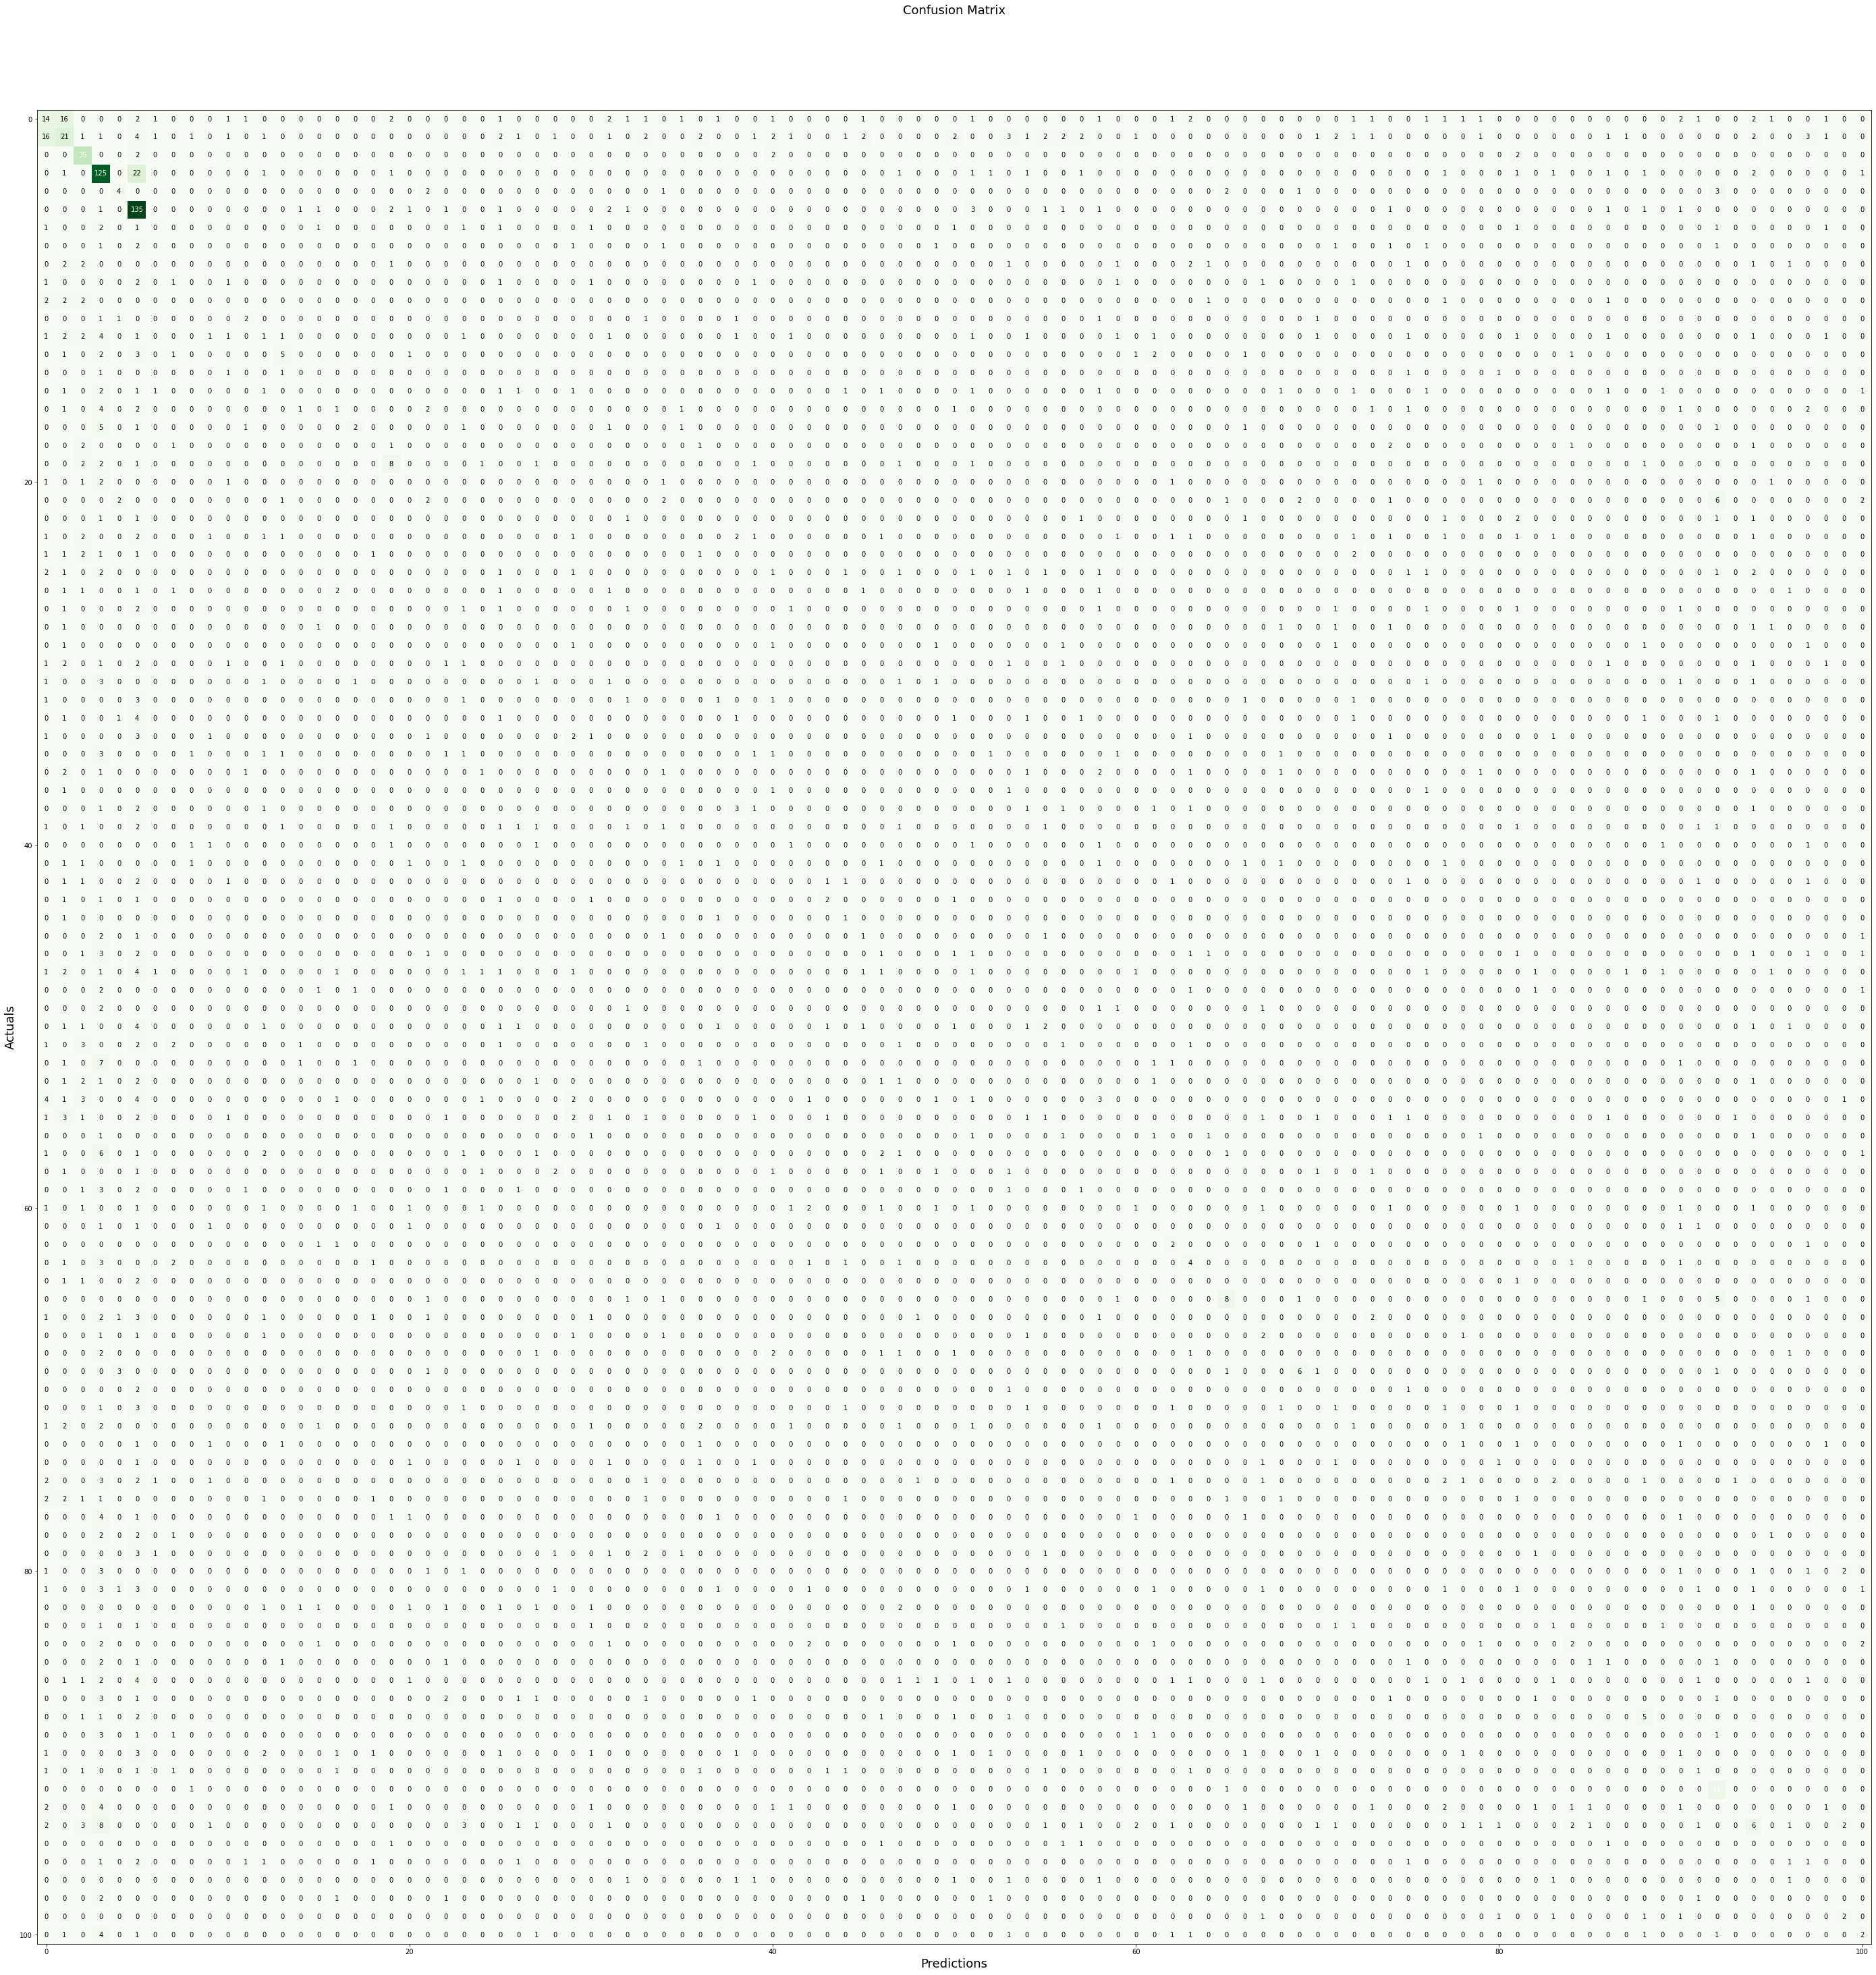

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(50, 50), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#Yêu cầu 4

In [ ]:
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
svc_sp = SVC()
o_vs_r = OneVsRestClassifier(svc_sp)

In [ ]:
o_vs_r.fit(x_train, y_train)



OneVsRestClassifier(estimator=SVC())

In [ ]:
SVM_one_rest = svm.SVC(C=1,decision_function_shape='ovr')
SVM_one_rest.fit(x_train, y_train)

SVC(C=1)

In [ ]:
y_pred_one_rest = o_vs_r.predict(x_test)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_one_rest))

Accuracy: 0.2609447004608295


In [ ]:
print("Support vector:", len(SVM_one_rest.support_vectors_))

Support vector: 4807


In [ ]:
y_pred_valid_one_rest = o_vs_r.predict(x_val)


In [ ]:
print(metrics.confusion_matrix(y_val, y_pred_valid_one_rest))

[[14 16  0 ...  1  0  0]
 [16 21  1 ...  1  0  0]
 [ 0  0 35 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  1  0 ...  0  0  2]]


In [ ]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred_valid_one_rest)

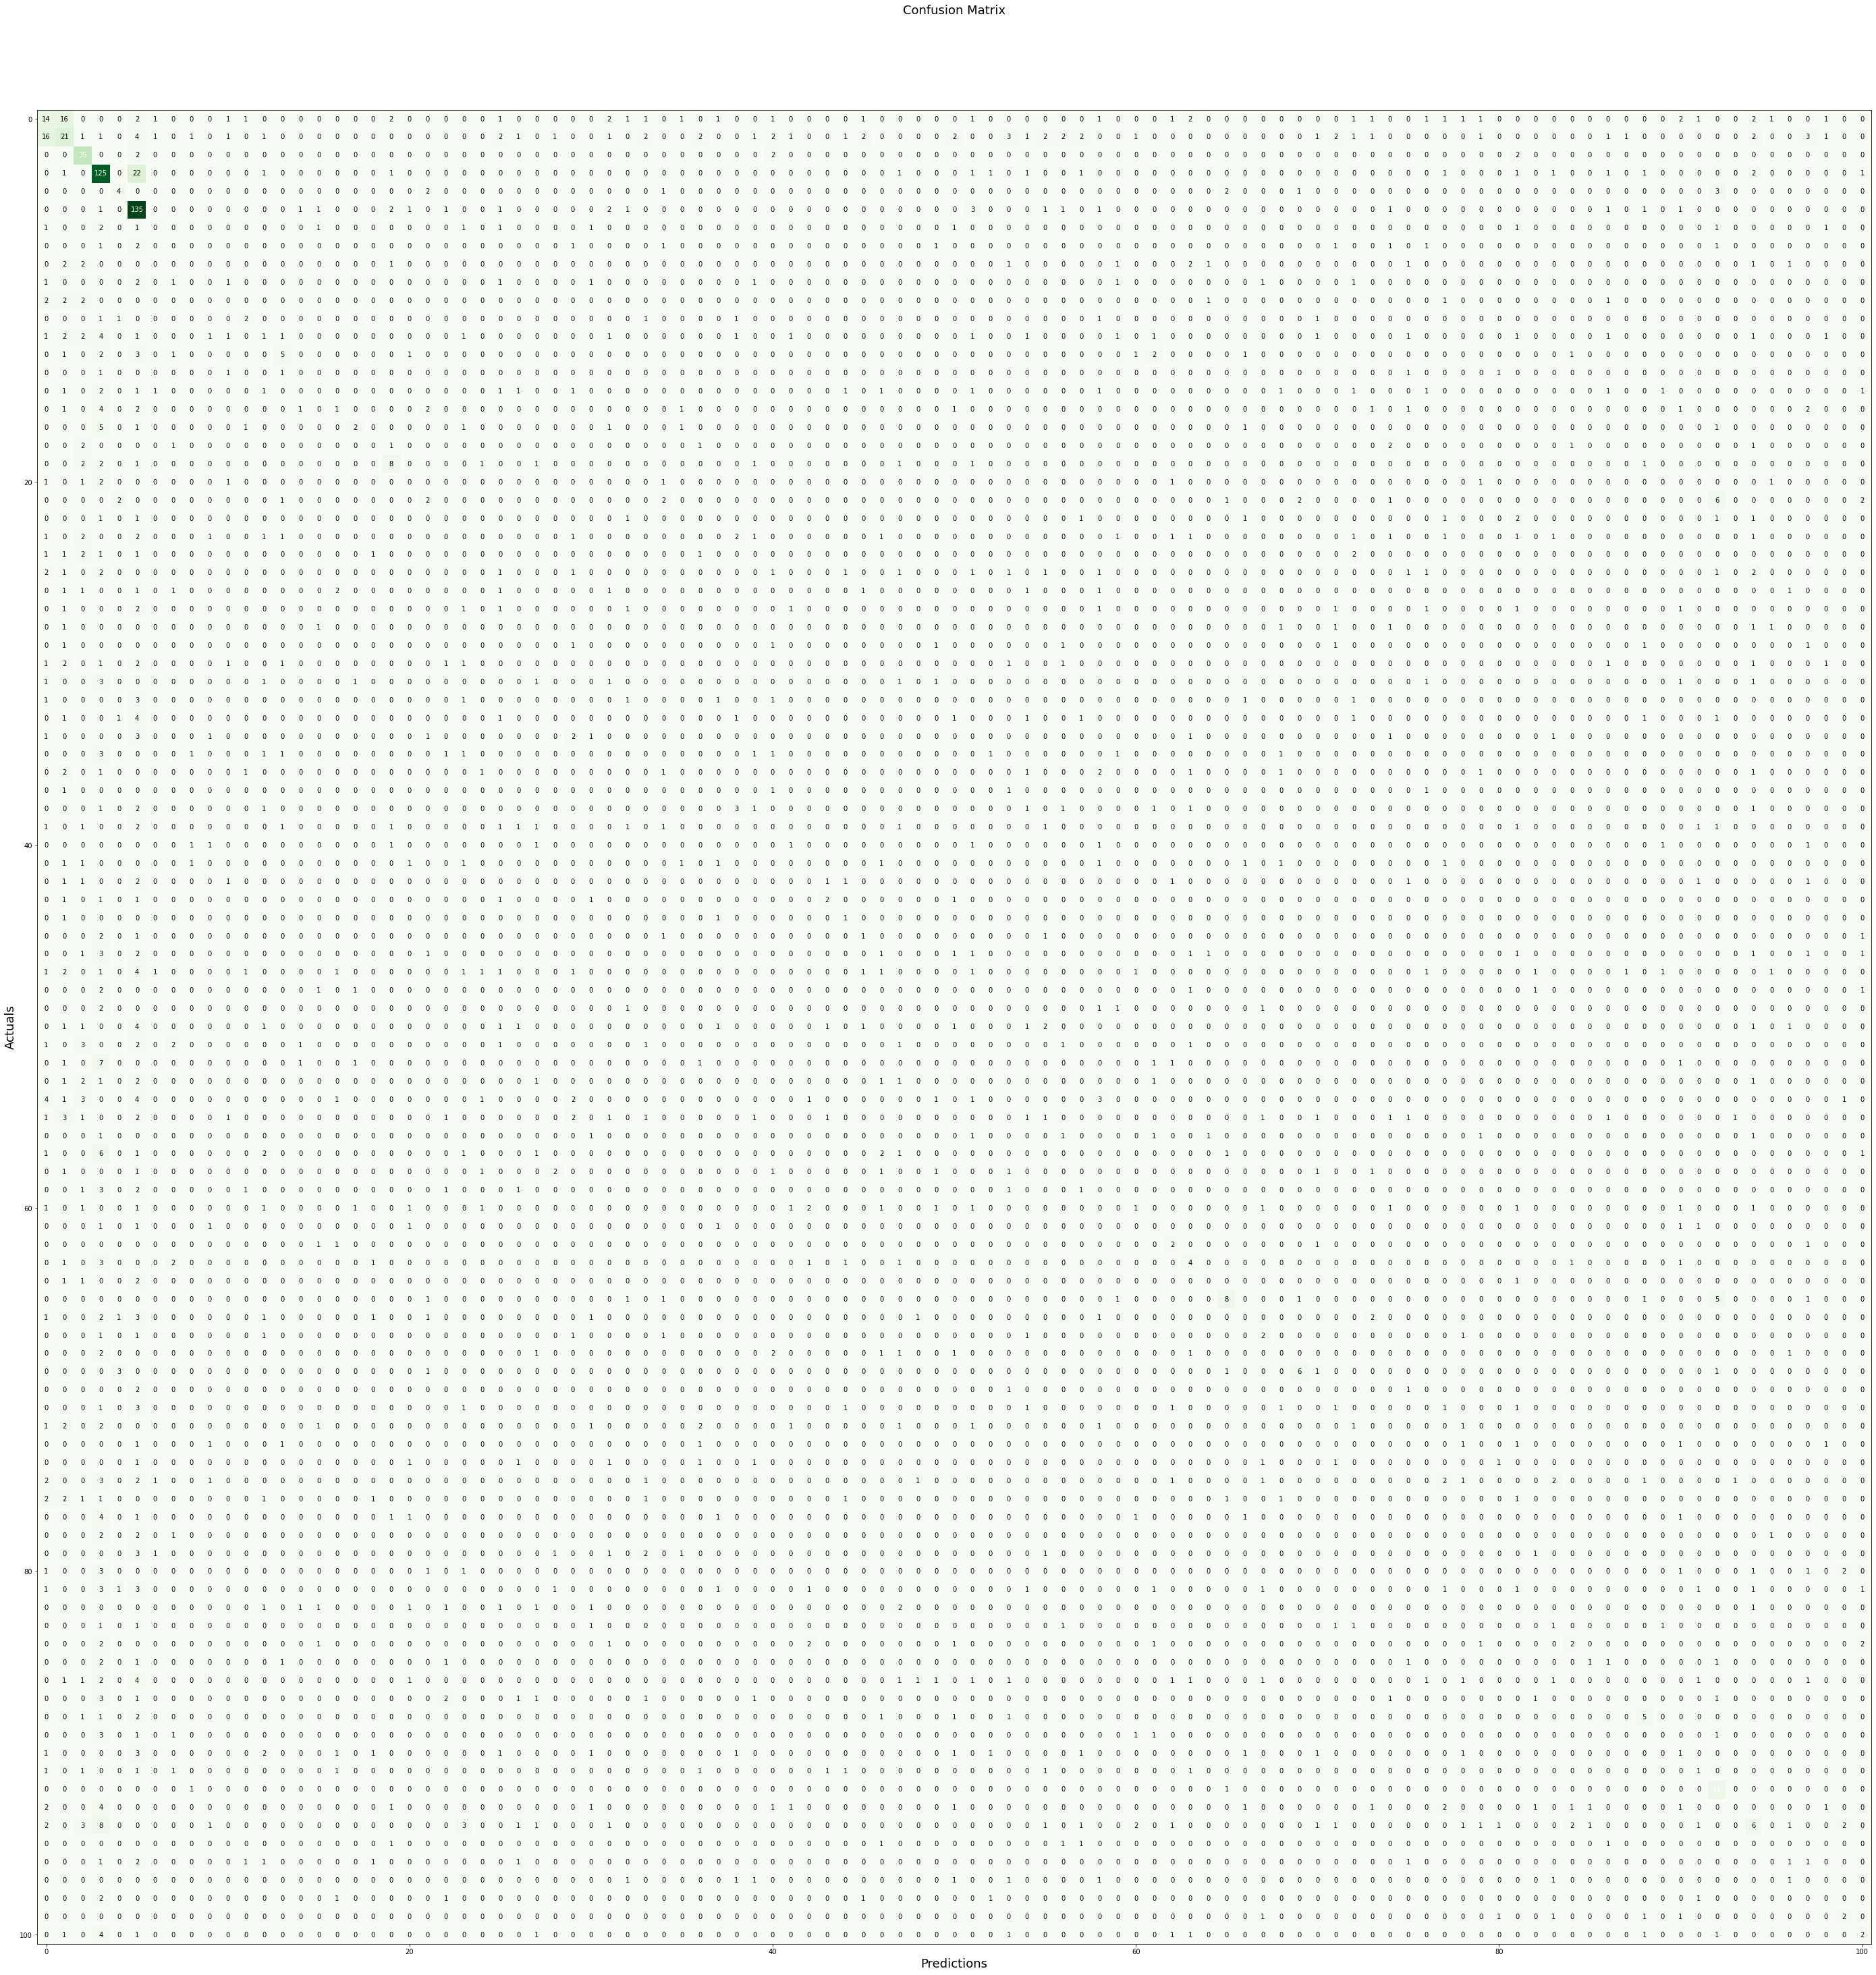

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(50, 50), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()